# Recognize digits pattern in loaded images with BatchNormalization

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [20]:
# Load the MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
digit_name = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

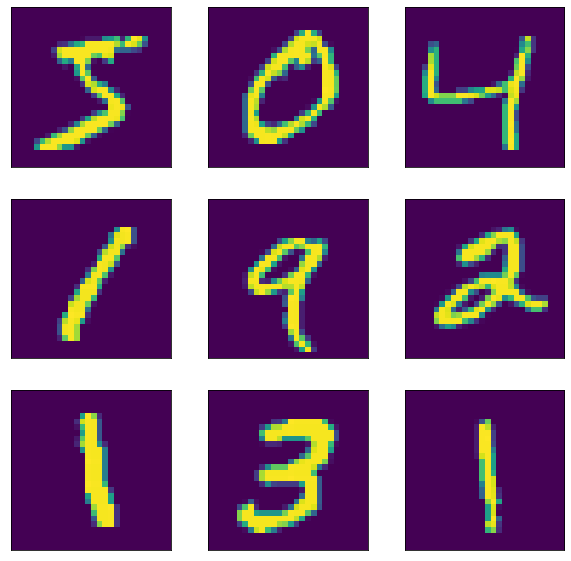

In [21]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])

In [5]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.utils import np_utils

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2] 
print(num_pixels)

784


In [7]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train = X_train / 255.
X_test = X_test / 255.

In [10]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
X_train[0].shape

(784,)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization

def base_models():
    model = Sequential()                    
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #Dropout(0.40)
    model.add(BatchNormalization())
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    #Dropout(0.30)
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build the Model
model = base_models()

# Fit the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=14, batch_size=200, verbose=2)

# Final Evaluation of the Model
scores = model.evaluate(X_test, y_test, verbose=0)

#print(scores)
print("Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/14
300/300 - 6s - loss: 0.2115 - accuracy: 0.9377 - val_loss: 0.1369 - val_accuracy: 0.9641
Epoch 2/14
300/300 - 4s - loss: 0.0757 - accuracy: 0.9770 - val_loss: 0.0755 - val_accuracy: 0.9768
Epoch 3/14
300/300 - 4s - loss: 0.0470 - accuracy: 0.9860 - val_loss: 0.0791 - val_accuracy: 0.9760
Epoch 4/14
300/300 - 4s - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0711 - val_accuracy: 0.9769
Epoch 5/14
300/300 - 4s - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0698 - val_accuracy: 0.9782
Epoch 6/14
300/300 - 4s - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0816 - val_accuracy: 0.9778
Epoch 7/14
300/300 - 4s - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.0732 - val_accuracy: 0.9800
Epoch 8/14
300/300 - 4s - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.0920 - val_accuracy: 0.9746
Epoch 9/14
300/300 - 4s - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0999 - val_accuracy: 0.9740
Epoch 10/14
300/300 - 4s - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.1005 - val_accuracy: 0.9740

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 256)               1024      
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 271,370
Trainable params: 270,346
Non-trainable params: 1,024
____________________________________________

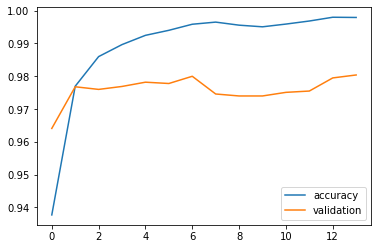

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

In [17]:
loss,acc = model.evaluate(X_test, y_test, verbose=0)
print(loss,acc)

0.08096939325332642 0.980400025844574


In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
def predict(desired_img):
    
    X_t = desired_img.reshape(1, num_pixels).astype('float32')
    pred_category = digit_name[np.argmax(model.predict(X_t))]
    
    return pred_category

'Four'

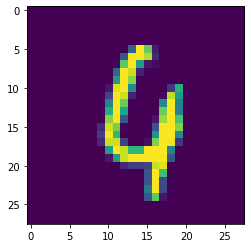

In [22]:
import random as rnd
import numpy as np
rnd_int = rnd.randint(0, X_train.shape[0])
plt.imshow(X_train[rnd_int])
predict(X_train[rnd_int])

In [23]:
x= X_train[0]
type(x)
x.shape

(28, 28)

'One'

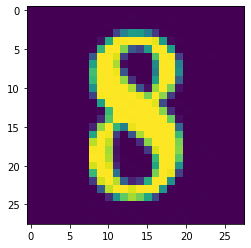

In [25]:
#1. Correct: loading image from local memory. 
img = plt.imread('num8.jpg')
img = img[:, :, 0]
plt.imshow(img)
predict(img)

'Two'

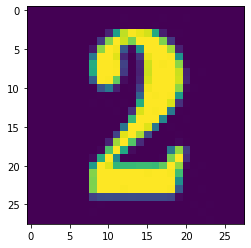

In [26]:
#2. Correct: loading image from local memory. 
img = plt.imread('num2.jpg')
img = img[:, :, 0]
plt.imshow(img)
predict(img)

'Three'

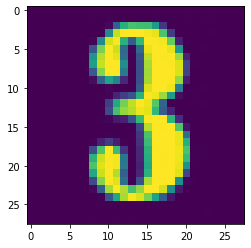

In [27]:
#3. Correct: loading image from local memory. 
img = plt.imread('num3.jpg')
img = img[:, :, 0]
plt.imshow(img)
predict(img)